In [ ]:
!rm -rf Whats-this-rock/
!git clone https://github.com/udaylunawat/Whats-this-rock.git
%cd /content/Whats-this-rock/
!pip install -r requirements-dev.txt

Cloning into 'Whats-this-rock'...
remote: Enumerating objects: 745, done.
remote: Counting objects: 100% (299/299), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 745 (delta 183), reused 205 (delta 94), pack-reused 446
Receiving objects: 100% (745/745), 3.03 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (450/450), done.
/content/Whats-this-rock
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 503.2 MB 5.5 kB/s 
     |████████████████████████████████| 1.6 MB 42.4 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 1.8 MB 38.4 MB/s 
     |████████████████████████████████| 227 kB 49.1 MB/s 
     |████████████████████████████████| 5.8 MB 33.9 MB/s 
     |████████████████████████████████| 438 kB 59.7 MB/s 
     |████████████████████████████████| 157 kB 47.3 MB/s 
     |████████████████████████████████| 181 kB 45.7 MB/s 
     

In [ ]:
%cd /content/Whats-this-rock/

/content/Whats-this-rock


In [ ]:
# from google.colab import files
# print("Upload Kaggle.json")
# files.upload();

! wget https://www.dropbox.com/s/9mhxs1p4mgb8gyh/kaggle.json

--2022-08-06 15:05:07--  https://www.dropbox.com/s/9mhxs1p4mgb8gyh/kaggle.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9mhxs1p4mgb8gyh/kaggle.json [following]
--2022-08-06 15:05:08--  https://www.dropbox.com/s/raw/9mhxs1p4mgb8gyh/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef6f3e9939e85474bdb1e66557.dl.dropboxusercontent.com/cd/0/inline/BqhZCph_PabyY2EL_VuJim23bukrhhEKMI7iFBEnIorE4EukBicvoZru5hvylyDn-VD3nI1M2JXNQILf3jAhjf-EASBpv3NM32VLHmdYDh2Si5EfuIcMn8M-sAV8fzUH9QR6Y8-HHTzUVzU0h_7EZp4z2f1umYFWMlw-kz5CVxS2BA/file# [following]
--2022-08-06 15:05:08--  https://ucef6f3e9939e85474bdb1e66557.dl.dropboxusercontent.com/cd/0/inline/BqhZCph_PabyY2EL_VuJim23bukrhhEKMI7iFBEnIorE4EukBicvoZru5hvylyDn-VD3nI1

In [ ]:
!sh setup.sh
!python preprocess.py --root data/1_extracted \
                      --oversample

 95% 152M/159M [00:00<00:00, 207MB/s]
100% 159M/159M [00:00<00:00, 222MB/s]


Removing corrupted images...
Total images before deletion = 2083
Total 143 corrupted image moved to 'corrupted_images' folder

Splitting files in Train, Validation and Test and saving to data/4_tfds_dataset/
Finding smallest class for oversampling fixed parameter.
Smallest class count is  66
Copying files: 1940 files [00:00, 2834.80 files/s]
Oversampling: 7 classes [00:01,  4.40 classes/s]


In [ ]:
import json
config = dict(
    notes="7 classes, keras-cv, augment:True, oversample",
    root_dir="data/4_tfds_dataset",
    project_name="rock-classification-with-keras-cv",
    model_name="mobilenet",
    num_classes=7,
    sample_size=1.0,
    augment=True,
    optimizer="adam",
    init_learning_rate=0.0005,
    batch_size=128,
    max_epochs=15,
    image_size=224,
    # lr_decay_rate = 0.7,
    loss_fn="categoricalcrossentropy",
    metrics=['accuracy'],
    earlystopping_patience=10,
    lr_reduce_patience=5,
)

# save dictionary to config.json file
with open('config.json', 'w') as f:
    json.dump(config, f)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import losses
from tensorflow.keras import optimizers
import keras_cv

AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
import cv2
import os
import numpy as np

# EDA

In [ ]:
import pandas as pd
from data_utilities import get_df


def get_dims(file):
    '''Returns dimenstions for an RBG image'''
    im = cv2.imread(file)
    arr = np.array(im)
    h, w = arr.shape[0], arr.shape[1]
    return h,w

    
df = get_df("data/2_processed")
df['dimensions'] = df['file_path'].apply(lambda x: get_dims(x))
df['image_width'] = df['dimensions'].apply(lambda x: x[0])
df['image_height'] = df['dimensions'].apply(lambda x: x[1])

In [ ]:
min(df['class'].value_counts())

66

In [ ]:
df.describe()

,image_width,image_height
count,1940.000000,1940.00000
mean,362.538660,478.73866
std,385.801727,405.73214
min,58.000000,77.00000
25%,194.000000,260.00000
50%,252.000000,380.00000
75%,408.000000,612.00000
max,6720.000000,5472.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_name     1940 non-null   object
 1   class         1940 non-null   object
 2   file_path     1940 non-null   object
 3   dimensions    1940 non-null   object
 4   image_width   1940 non-null   int64 
 5   image_height  1940 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 91.1+ KB


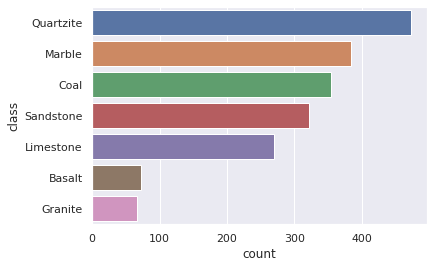

In [ ]:
import seaborn as sns

class_names = df['class'].value_counts().keys()
counts = df['class'].value_counts().values

count_df = pd.DataFrame(list(zip(class_names, counts)), columns=['class', 'count'])

sns.set_theme(style="darkgrid")
ax = sns.barplot(y='class', x='count', data=count_df)

In [ ]:
width_list = df.image_width
height_list = df.image_height

average width: 362.5386597938144 and height: 478.7386597938144


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


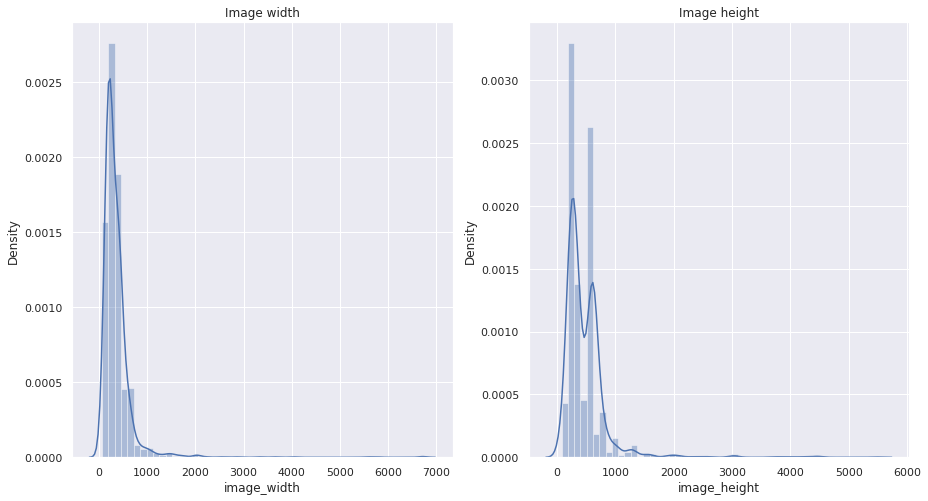

In [ ]:
average_width = sum(width_list)/len(width_list)
average_height = sum(height_list)/len(height_list)

print('average width: {} and height: {}'.format(average_width, average_height))

fig, ax =plt.subplots(1,2, figsize=(15, 8))

sns.distplot(width_list, ax=ax[0])
ax[0].set_title('Image width')
sns.distplot(height_list, ax=ax[1])
ax[1].set_title('Image height')
fig.show()

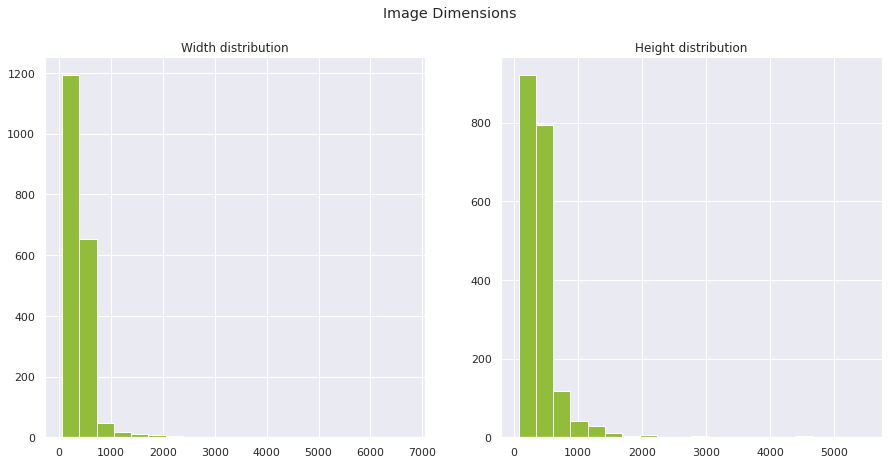

In [ ]:
# plot histograms to show the distribution of width and height values
fig, axs = plt.subplots(1,2, figsize=(15,7))
axs[0].hist(df.image_width.values, bins=20, color = '#91bd3a')
axs[0].set_title('Width distribution')
# axs[0].set_xlim(1000, 3000)

axs[1].hist(df.image_height.values, bins=20, color = '#91bd3a')
axs[1].set_title('Height distribution')
# axs[1].set_xlim(1000, 3000)

plt.suptitle('Image Dimensions')
plt.show()

In [ ]:
get_df("data/4_tfds_dataset/train")['class'].value_counts()

Granite      409
Marble       409
Basalt       409
Coal         409
Sandstone    409
Limestone    409
Quartzite    409
Name: class, dtype: int64

In [ ]:
get_df("data/4_tfds_dataset/val")['class'].value_counts()

Granite      32
Marble       32
Basalt       32
Coal         32
Sandstone    32
Limestone    32
Quartzite    32
Name: class, dtype: int64

In [ ]:
get_df("data/4_tfds_dataset/test")['class'].value_counts()

Granite      32
Marble       32
Basalt       32
Coal         32
Sandstone    32
Limestone    32
Quartzite    32
Name: class, dtype: int64

## Data Augmentation

In [ ]:
!rm -rf data/4_tfds_dataset
!mkdir data/4_tfds_dataset checkpoints

# https://stackoverflow.com/a/64006242/9292995
import splitfolders

# If your datasets is balanced (each class has the same number of samples), choose ratio otherwise fixed.
splitfolders.fixed('data/2_processed', 
                   output="data/4_tfds_dataset", 
                   oversample=True, fixed=(30),
                   seed=1337)

# https://www.tensorflow.org/datasets/api_docs/python/tfds/folder_dataset/ImageFolder
builder = tfds.ImageFolder('data/4_tfds_dataset')
print(builder.info)  # num examples, labels... are automatically calculated
data = builder.as_dataset(split=None, as_supervised=True)

mkdir: cannot create directory ‘checkpoints’: File exists



Copying files: 0 files [00:00, ? files/s]
Copying files: 169 files [00:00, 1689.46 files/s]
Copying files: 404 files [00:00, 2073.30 files/s]
Copying files: 612 files [00:00, 1757.04 files/s]
Copying files: 875 files [00:00, 2065.04 files/s]
Copying files: 1088 files [00:00, 1734.31 files/s]
Copying files: 1272 files [00:00, 1306.39 files/s]
Copying files: 0 files [01:13, ? files/s]

Copying files: 1557 files [00:01, 1137.39 files/s]
Copying files: 1940 files [00:01, 1529.51 files/s]
Oversampling: 7 classes [00:01,  6.07 classes/s]


tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='data/4_tfds_dataset',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=7),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3093, num_shards=1>,
        'val': <SplitInfo num_examples=209, num_shards=1>,
    },
    citation="""""",
)


In [ ]:
num_classes = builder.info.features['label'].num_classes

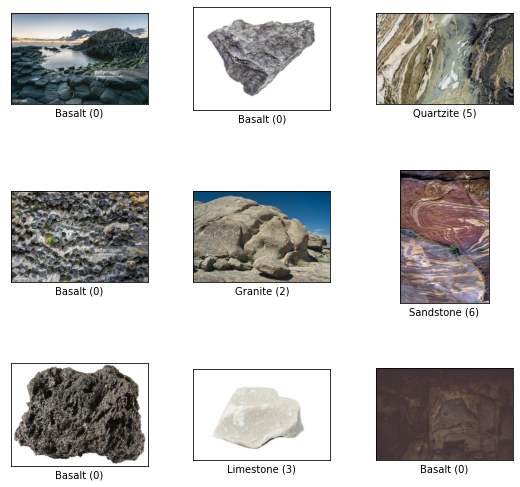

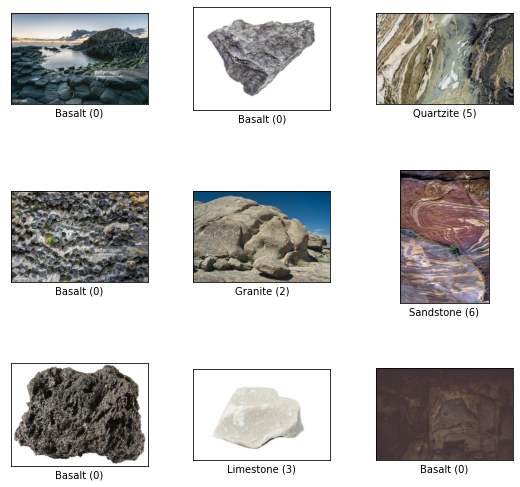

In [ ]:
# OPTIONAL show dataset
ds = builder.as_dataset(split='train', shuffle_files=True)
tfds.show_examples(ds, builder.info)

In [ ]:
# # https://stackoverflow.com/a/37343690/9292995
# # https://keras.io/guides/keras_cv/cut_mix_mix_up_and_rand_augment/

IMAGE_SIZE = (config["image_size"], config["image_size"])


def to_dict(image, label):
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.cast(image, tf.float32)
    label = tf.one_hot(label, config["num_classes"])
    return {"images": image, "labels": label}


def prepare_dataset(dataset, split):
    if split == "train":
        return (
            dataset.shuffle(10 * config["batch_size"])
            .map(to_dict, num_parallel_calls=AUTOTUNE)
            .batch(config["batch_size"])
        )
    elif split == "val" or split == "test":
        return (
            dataset.map(to_dict, num_parallel_calls=AUTOTUNE)
            .batch(config["batch_size"])
        )


def load_dataset(split="train"):
    dataset = data[split]
    return prepare_dataset(dataset, split)


In [ ]:
def visualize_dataset(dataset, title):
    plt.figure(figsize=(12, 12)).suptitle(title, fontsize=18)
    for i, samples in enumerate(iter(dataset.take(9))):
        images = samples["images"]
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

def apply_rand_augment(inputs):
    inputs["images"] = rand_augment(inputs["images"])
    return inputs

rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255),
    augmentations_per_image=3,
    magnitude=0.3,
    magnitude_stddev=0.2,
    rate=0.5,
)

cut_mix = keras_cv.layers.CutMix()
mix_up = keras_cv.layers.MixUp()


def cut_mix_and_mix_up(samples):
    samples = cut_mix(samples, training=True)
    samples = mix_up(samples, training=True)
    return samples

def preprocess_for_model(inputs):
    images, labels = inputs["images"], inputs["labels"]
    images = tf.cast(images, tf.float32)
    return images, labels

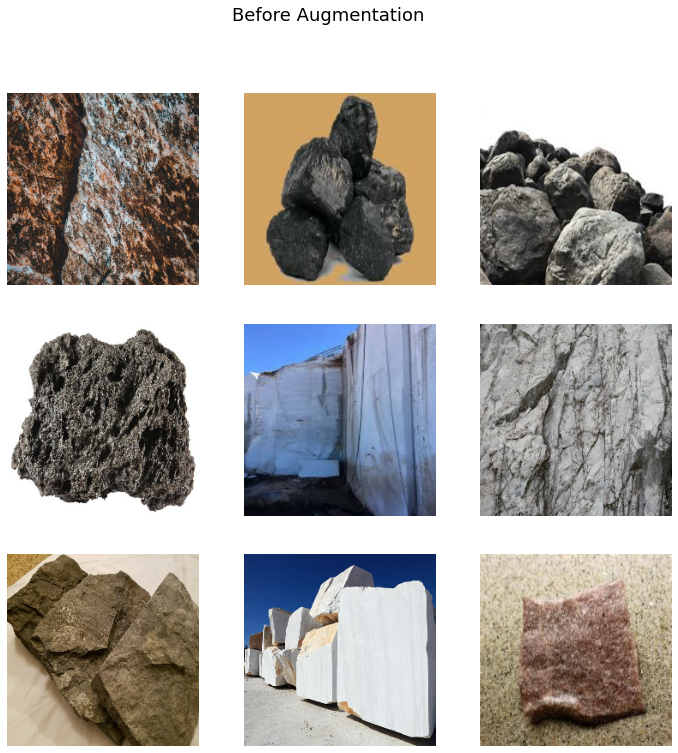

In [ ]:
train_dataset = load_dataset()
visualize_dataset(train_dataset, title="Before Augmentation")

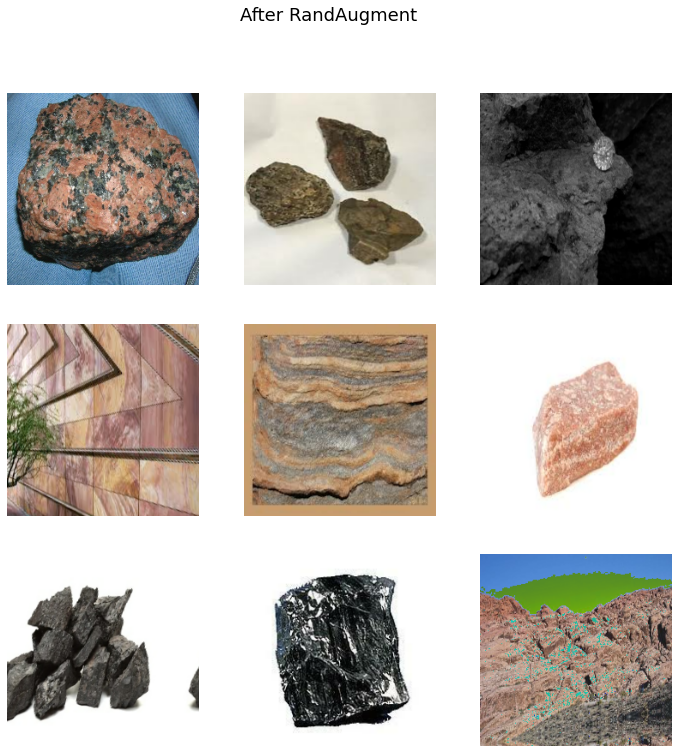

In [ ]:
train_dataset = load_dataset().map(apply_rand_augment, num_parallel_calls=AUTOTUNE)
visualize_dataset(train_dataset, title="After RandAugment")

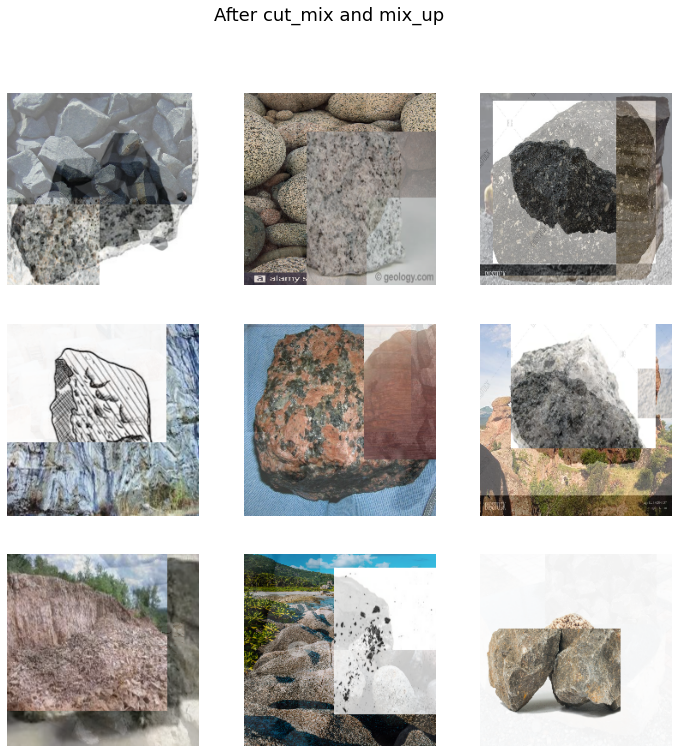

In [ ]:
train_dataset = load_dataset().map(cut_mix_and_mix_up, num_parallel_calls=AUTOTUNE)
visualize_dataset(train_dataset, title="After cut_mix and mix_up")